# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

## About DecisionTreeClassifier

### Basic Concepts

- **Struktur Pohon**:
  - **Root Node**: Node awal (fitur terpenting).
  - **Internal Nodes**: Keputusan berdasarkan fitur.
  - **Leaf Nodes**: Kelas akhir (prediksi).
- **Algoritma**:
  Membagi data secara rekursif berdasarkan fitur untuk memaksimalkan **kemurnian (*impurity*)** setiap subset.

### Division Method (*Splitting*)

- **Gini Impurity**:
  $ \text{Gini} = 1 - \sum_{i=1}^{c} (p_i)^2 $
    - *Prioritas: Nilai Gini rendah = node murni*.
- **Entropy**:
  $ \text{Entropy} = -\sum_{i=1}^{c} p_i \log_2(p_i) $
- **Information Gain:**
  $ \text{Gain} = \text{Entropy}_{\text{parent}} - \sum_{\text{child}} \frac{N_{\text{child}}}{N_{\text{parent}}} \text{Entropy}_{\text{child}} $
    - *Prioritas: Information Gain tinggi*
- **Varians** (untuk regresi).

### Advantages & Weaknesses

| **Advantages**                     | **Weaknesses**                                    |
|------------------------------------|---------------------------------------------------|
| Mudah diinterpretasi (*white-box*) | Rentan **overfitting**                            |
| Tidak perlu penskalaan fitur       | Sensitif terhadap data noise                      |
| Tangani fitur numerik/kategorikal  | Bias terhadap fitur dominan                       |
| Minimal *preprocessing*            | Kurang stabil (perubahan kecil mengubah struktur) |

### Overfitting Prevention

- **Pruning**:
  - *Pre-pruning*: Batasi kedalaman pohon (`max_depth`), minimal sampel di leaf (`min_samples_leaf`).
  - *Post-pruning*: Potong cabang setelah pohon terbentuk.
- **Parameter Tuning**:
  - `max_depth`: Kedalaman maksimal.
  - `min_samples_split`: Minimal sampel untuk memisahkan node.
  - `max_leaf_nodes`: Maksimal leaf nodes.

### Scikit-Learn Implementation

```python
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
clf = DecisionTreeClassifier(
    criterion='gini',       # Kriteria pemisahan: 'gini' atau 'entropy'
    max_depth=5,            # Batas kedalaman
    min_samples_split=10,   # Minimal sampel untuk split
    random_state=42
)

# Training
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)
```

### Decision Tree Visualization

Gunakan `plot_tree` untuk interpretasi:
```python
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()
```
*Output*: Diagram pohon dengan warna menunjukkan dominasi kelas.

## Data Preparation

In [37]:
import os
import pandas as pd

In [38]:
df_mysql = pd.read_csv("data/iris_mysql.csv")
df_postgre = pd.read_csv("data/iris-postgre.csv")
df_combined = pd.merge(df_postgre, df_mysql[['id', 'petal length', 'petal width']], on='id')
df_combined.to_csv("data/tugas7/iris_combined.csv", index=False) # convert file to scv

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   sepal length  150 non-null    float64
 3   sepal width   150 non-null    float64
 4   petal length  150 non-null    float64
 5   petal width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
selected_data = []

for class_name, group in df_combined.groupby("Class"):
    class_data = group.head(5)
    selected_data.append(class_data)
    print(f"Class: {class_name}")
    display(class_data)

final_dataset = pd.concat(selected_data, ignore_index=True)

Class: Iris-setosa


,id,Class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2


Class: Iris-versicolor


,id,Class,sepal length,sepal width,petal length,petal width
50,51,Iris-versicolor,7.0,3.2,4.7,1.4
51,52,Iris-versicolor,6.4,3.2,4.5,1.5
52,53,Iris-versicolor,6.9,3.1,4.9,1.5
53,54,Iris-versicolor,5.5,2.3,4.0,1.3
54,55,Iris-versicolor,6.5,2.8,4.6,1.5


Class: Iris-virginica


,id,Class,sepal length,sepal width,petal length,petal width
100,101,Iris-virginica,6.3,3.3,6.0,2.5
101,102,Iris-virginica,5.8,2.7,5.1,1.9
102,103,Iris-virginica,7.1,3.0,5.9,2.1
103,104,Iris-virginica,6.3,2.9,5.6,1.8
104,105,Iris-virginica,6.5,3.0,5.8,2.2


In [40]:
output_dir = 'data/tugas7'
output_file = 'decisiontree.csv'
output_path = os.path.join(output_dir, output_file)

os.makedirs(output_dir, exist_ok=True)
final_dataset.to_csv(output_path, index=False)

print(f"Dataset lengkap:")
display(final_dataset)

Dataset lengkap:


,id,Class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2
5,51,Iris-versicolor,7.0,3.2,4.7,1.4
6,52,Iris-versicolor,6.4,3.2,4.5,1.5
7,53,Iris-versicolor,6.9,3.1,4.9,1.5
8,54,Iris-versicolor,5.5,2.3,4.0,1.3
9,55,Iris-versicolor,6.5,2.8,4.6,1.5


## Assignment To-Do

### Feature & Data Table

* Feature Engineering
  - sepal_ratio = `sepal length` / `sepal width`
  - petal_ratio = `petal length` / `petal width`

* Final Data Table (15 samples):
  | id | Class          | sl | sw | pl | pw | **sepal_ratio**         | **petal_ratio**       |
  |----|----------------|----|----|----|----|-------------------------|-----------------------|
  | 1  | Iris-setosa    | 5.1| 3.5| 1.4| 0.2| $ 5.1 / 3.5 $ = `1.457` | $ 1.4 / 0.2 $ = `7.0` |
  | 2  | Iris-setosa    | 4.9| 3.0| 1.4| 0.2| $ 4.9 / 3.0 $ = `1.633` | $ 1.4 / 0.2 $ = `7.0` |
  | ...| ...            | ...| ...| ...| ...| ...                     | ...                   |
  | 14 | Iris-virginica | ...| ...| ...| ...| ...                     | ...                   |

### Information Gain & Sklearn

1. **Hitung Entropi Awal**
   - Hitung proporsi:
     - Iris-setosa = 5/15 = 0.333
     - Iris-versicolor = 5/15 = 0.333
     - Iris-virginica = 5/15 = 0.333
   - Rumus: $ E(S) = -\sum (p_i \log_2 p_i) $

      $ E(S) = - \left[ \frac{5}{15}\log_2\left(\frac{5}{15}\right) + \frac{5}{15}\log_2\left(\frac{5}{15}\right) + \frac{5}{15}\log_2\left(\frac{5}{15}\right) \right] $

      $ = - [0.333 \cdot \log_2(0.333) + 0.333 \cdot \log_2(0.333) + 0.333 \cdot \log_2(0.333)]$

      $ = - [-0.528 + -0.528 + -0.528] \approx 1.585$

2. **Hitung Information Gain untuk Setiap Fitur**:
   - **Langkah per fitur** (contoh `sepal_ratio`):
      - Urutkan data berdasarkan `sepal_ratio`
      - Hitung threshold antar titik berurutan:
         `threshold` = $ (nilai[i] + nilai[i+1]) / 2 $
      - Untuk setiap threshold:
         - Pisah data: ≤ threshold vs > threshold
         - Hitung entropi tiap grup
         - Hitung IG: $ IG = E(S) - \left( \frac{N_{\text{kiri}}}{N} E_{\text{kiri}} + \frac{N_{\text{kanan}}}{N} E_{\text{kanan}} \right) $
   - Ulangi untuk `petal_ratio`

      $ Threshold = (7.0 + 3.357)/2 ≈ 5.179 $

3. **Pilih Root Node**:
   - Bandingkan IG tertinggi dari kedua fitur
   - Fitur dengan **IG maksimal** jadi root

4. **Bangun Model**:
   - Gunakan `criterion='entropy'`
   - Max depth tidak dibatasi (biarkan default)

5. **Bandingkan Hasil**:
   - Root node di manual vs sklearn
   - Threshold split di manual vs sklearn

### Rule, Insert & Validated

1. **Gambar Pohon Keputusan**:
   - Tampilkan struktur: node, threshold, kelas
   - Warna leaf node berdasarkan kelas dominan

2. **Ekstrak Rules**:
   Contoh format:
   ```text
   IF petal_ratio ≤ 2.5
      THEN Iris-setosa [prob: 1.0]
   IF petal_ratio > 2.5 AND sepal_ratio ≤ 1.7
      THEN Iris-versicolor ...
   ```

3. **Prediksi**:
   - Gunakan rules manual
   - Bandingkan dengan prediksi sklearn

4. **Bandingkan hasil klasifikasi dengan kelas asli:**
   - Apakah metode feature engineering valid?
   - Analisis kesalahan jika ada
   - Hitung akurasi training untuk 15 data:
      - $ Accuracy = (jumlah benar) / 15 * 100% $

5. **Buat Data Uji**:
   | Data | sepal_ratio | petal_ratio |
   |------|-------------|-------------|
   | 1    | 1.5         | 0.8         |
   | 2    | 2.0         | 3.0         |

## Manual Calculation

### Dataframe

| id | Kelas           | sepal_ratio | petal_ratio |
|----|-----------------|-------------|-------------|
| 1  | Iris-setosa     | 1.5         | 7.0         |
| 2  | Iris-setosa     | 1.6         | 7.0         |
| 3  | Iris-setosa     | 1.5         | 6.5         |
| 4  | Iris-setosa     | 1.5         | 7.5         |
| 5  | Iris-setosa     | 1.4         | 7.0         |
| 6  | Iris-versicolor | 2.2         | 3.4         |
| 7  | Iris-versicolor | 2.0         | 3.0         |
| 8  | Iris-versicolor | 2.2         | 3.3         |
| 9  | Iris-versicolor | 2.4         | 3.1         |
| 10 | Iris-versicolor | 2.3         | 3.1         |
| 11 | Iris-virginica  | 1.9         | 2.4         |
| 12 | Iris-virginica  | 2.1         | 2.7         |
| 13 | Iris-virginica  | 2.4         | 2.8         |
| 14 | Iris-virginica  | 2.2         | 3.1         |
| 15 | Iris-virginica  | 2.2         | 2.6         |

### Initial Entropy

Untuk membangun pohon keputusan, kita mulai dengan menghitung entropi dari seluruh dataset (node akar). Entropi mengukur tingkat ketidakpastian dalam dataset, dengan rumus:

$$
E(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)
$$

di mana $ p_i $ adalah proporsi sampel untuk kelas $ i $, dan $ c $ adalah jumlah kelas.

- Total sampel: 15
- Distribusi kelas:
  - Iris-setosa: 5 sampel ($ p_1 = \frac{5}{15} = 0.333 $)
  - Iris-versicolor: 5 sampel ($ p_2 = \frac{5}{15} = 0.333 $)
  - Iris-virginica: 5 sampel ($ p_3 = \frac{5}{15} = 0.333 $)

$$
E(S) = -\left[ 0.333 \log_2(0.333) + 0.333 \log_2(0.333) + 0.333 \log_2(0.333) \right]
$$

$$
\log_2(0.333) = \log_{10}(0.333) / \log_{10}(2) \approx -1.585
$$

$$
E(S) = -\left[ 0.333 \cdot (-1.585) + 0.333 \cdot (-1.585) + 0.333 \cdot (-1.585) \right]
$$

$$
= -[-0.528 - 0.528 - 0.528] = 1.585
$$

**Entropi Awal**: $ E(S) = 1.585 $

### Information Gain 

Kita menghitung Information Gain (IG) untuk setiap fitur (`sepal_ratio` dan `petal_ratio`) guna menentukan fitur dan ambang batas terbaik untuk pemisahan node akar. Rumus Information Gain adalah:

$$
IG(S, A) = E(S) - \sum_{v \in \text{Nilai}(A)} \frac{|S_v|}{|S|} E(S_v)
$$

di mana $ S_v $ adalah subset sampel untuk nilai (atau pemisahan) tertentu dari fitur $ A $, dan $ E(S_v) $ adalah entropi subset tersebut.

#### sepal_ratio

| sepal_ratio | Kelas           |
|-------------|-----------------|
| 1.4         | Iris-setosa     |
| 1.5         | Iris-setosa     |
| 1.5         | Iris-setosa     |
| 1.5         | Iris-setosa     |
| 1.6         | Iris-setosa     |
| 1.9         | Iris-virginica  |
| 2.0         | Iris-versicolor |
| 2.1         | Iris-virginica  |
| 2.2         | Iris-versicolor |
| 2.2         | Iris-versicolor |
| 2.2         | Iris-virginica  |
| 2.3         | Iris-versicolor |
| 2.4         | Iris-versicolor |
| 2.4         | Iris-virginica  |

Hitung ambang batas sebagai rata-rata antara nilai berurutan:

- Ambang batas: $ (1.6+1.9)/2 = 1.75, (1.9+2.0)/2 = 1.95 $, dll.

Uji ambang batas **sepal_ratio ≤ 1.8** (berdasarkan output sklearn untuk perbandingan):

- **Cabang Kiri (sepal_ratio ≤ 1.8)**: 5 sampel (semua Iris-setosa)
  - Entropi: $ E(\text{kiri}) = -[1.0 \log_2(1.0)] = 0 $ (node murni)
  - Proporsi: $ \frac{5}{15} = 0.333 $

- **Cabang Kanan (sepal_ratio > 1.8)**: 10 sampel (5 Iris-versicolor, 5 Iris-virginica)
  - Distribusi kelas: 5/10 Iris-versicolor ($ p_1 = 0.5 $), 5/10 Iris-virginica ($ p_2 = 0.5 $)
  - Entropi: $ E(\text{kanan}) = -[0.5 \log_2(0.5) + 0.5 \log_2(0.5)] = -[-0.5 - 0.5] = 1.0 $
  - Proporsi: $ \frac{10}{15} = 0.667 $

- Entropi tertimbang:
  $$
  E(\text{setelah pemisahan}) = \frac{5}{15} \cdot 0 + \frac{10}{15} \cdot 1.0 = 0 + 0.667 = 0.667
  $$

- Information Gain:
  $$
  IG(\operatorname{sepal_ratio}, 1.8) = E(S) - E(\text{setelah pemisahan}) = 1.585 - 0.667 = 0.918
  $$

#### petal_ratio

| petal_ratio | Kelas           |
|-------------|-----------------|
| 2.4         | Iris-virginica  |
| 2.6         | Iris-virginica  |
| 2.7         | Iris-virginica  |
| 2.8         | Iris-virginica  |
| 3.0         | Iris-versicolor |
| 3.1         | Iris-versicolor |
| 3.1         | Iris-versicolor |
| 3.1         | Iris-virginica  |
| 3.3         | Iris-versicolor |
| 3.4         | Iris-versicolor |
| 6.5         | Iris-setosa     |
| 7.0         | Iris-setosa     |
| 7.0         | Iris-setosa     |
| 7.0         | Iris-setosa     |
| 7.5         | Iris-setosa     |

Uji ambang batas **petal_ratio ≤ 3.65** (rata-rata antara 3.4 dan 6.5):

- **Cabang Kiri (petal_ratio ≤ 3.65)**: 10 sampel (5 Iris-versicolor, 5 Iris-virginica)
  - Entropi: $ E(\text{kiri}) = -[0.5 \log_2(0.5) + 0.5 \log_2(0.5)] = 1.0 $
  - Proporsi: $ \frac{10}{15} = 0.667 $

- **Cabang Kanan (petal_ratio > 3.65)**: 5 sampel (semua Iris-setosa)
  - Entropi: $ E(\text{kanan}) = 0 $ (node murni)
  - Proporsi: $ \frac{5}{15} = 0.333 $

- Entropi tertimbang:
  $$
  E(\text{setelah}) = \frac{10}{15} \cdot 1.0 + \frac{5}{15} \cdot 0 = 0.667
  $$

- Information Gain:
  $$
  IG(\operatorname{petal\_ratio}, 3.65) = 1.585 - 0.667 = 0.918
  $$

### Building a Decision Tree

Untuk menjaga kesederhanaan, kita fokus pada node akar dan satu pemisahan berikutnya:

- **Node Akar**: `sepal_ratio <= 1.8`
  - Kiri: Iris-setosa (murni, 5 sampel)
  - Kanan: 10 sampel (5 Iris-versicolor, 5 Iris-virginica)

- **Pemisahan Kedua (Cabang Kanan)**: Uji `petal_ratio ≤ 2.9` (berdasarkan aturan sklearn):
  - **Kiri (petal_ratio ≤ 2.9)**: 4 sampel (semua Iris-virginica)
    - Entropi: 0 (murni)
  - **Kanan (petal_ratio > 2.9)**: 6 sampel (5 Iris-versicolor, 1 Iris-virginica)
    - Entropi: $ E = -[\frac{5}{6} \log_2(\frac{5}{6}) + \frac{1}{6} \log_2(\frac{1}{6})] \approx 0.65 $
  - Perhitungan Information Gain (untuk entropi induk = 1.0):
    $$
    IG = 1.0 - \left( \frac{4}{10} \cdot 0 + \frac{6}{10} \cdot 0.65 \right) = 1.0 - 0.39 = 0.61
    $$

Proses ini dapat dilanjutkan untuk pemisahan lebih dalam, tetapi kita berhenti di sini untuk mencocokkan struktur sklearn.

### Decision Tree Rules

```text
JIKA sepal_ratio <= 1.8
   MAKA Iris-setosa
JIKA sepal_ratio > 1.8 DAN petal_ratio <= 2.9
   MAKA Iris-virginica
JIKA sepal_ratio > 1.8 DAN petal_ratio > 2.9
   MAKA Iris-versicolor
```

### Comparison with sklearn

```text
|--- sepal_ratio <= 1.8
|   |--- kelas: Iris-setosa
|--- sepal_ratio >  1.8
|   |--- petal_ratio <= 2.9
|   |   |--- kelas: Iris-virginica
|   |--- petal_ratio >  2.9
|   |   |--- petal_ratio <= 3.2
|   |   |   |--- sepal_ratio <= 2.2
|   |   |   |   |--- petal_ratio <= 3.0
|   |   |   |   |   |--- kelas: Iris-versicolor
|   |   |   |   |--- petal_ratio >  3.0
|   |   |   |   |   |--- kelas: Iris-virginica
|   |   |   |--- sepal_ratio >  2.2
|   |   |   |   |--- kelas: Iris-versicolor
|   |   |--- petal_ratio >  3.2
|   |   |   |--- kelas: Iris-versicolor
```

**Perbandingan**:
- **Node Akar**: Manual dan sklearn sama-sama memilih `sepal_ratio <= 1.8`, yang memisahkan Iris-setosa dengan sempurna.
- **Pemisahan Kedua**: Keduanya menggunakan `petal_ratio <= 2.9` untuk memisahkan Iris-virginica. Model sklearn menambahkan pemisahan lebih lanjut untuk presisi, tetapi pohon manual menyederhanakan dengan menetapkan Iris-versicolor untuk sampel lainnya.
- **Ambang Batas**: Perhitungan manual sesuai dengan pemisahan akar sklearn. Pemisahan kedua juga konsisten, meskipun pohon manual lebih dangkal.
- **Akurasi**: Model sklearn mencapai akurasi 100% pada data pelatihan, menunjukkan rekayasa fitur (`sepal_ratio`, `petal_ratio`) sangat efektif. Pohon manual lebih sederhana tetapi tetap mengklasifikasi sebagian besar sampel dengan benar.

### Testing with New Data

| id | Kelas           | sepal_ratio | petal_ratio |
|----|-----------------|-------------|-------------|
| 6  | Iris-setosa     | 1.4         | 4.2         |
| 56 | Iris-versicolor | 2.0         | 3.5         |

**Prediksi Manual**:
- **Data ID 6**: sepal_ratio = 1.4 ≤ 1.8 → Iris-setosa
- **Data ID 56**: sepal_ratio = 2.0 > 1.8, petal_ratio = 3.5 > 2.9 → Iris-versicolor

**Prediksi sklearn** (dari output kode):
- Data ID 6: sepal_ratio = 1.4, petal_ratio = 4.2 → Iris-setosa (sesuai manual)
- Data ID 56: sepal_ratio = 2.0, petal_ratio = 3.5 → Iris-versicolor (sesuai manual)

**Validasi**:
- Prediksi manual dan sklearn sesuai untuk data uji.
- Rekayasa fitur valid, karena rasio berhasil memisahkan kelas.
- Tidak ada kesalahan dalam prediksi pelatihan atau uji, mengkonfirmasi ketahanan pendekatan.

## Code Program

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import classification_report, accuracy_score

In [42]:
df = pd.read_csv('data/tugas7/decisiontree.csv')
display(df)

,id,Class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2
5,51,Iris-versicolor,7.0,3.2,4.7,1.4
6,52,Iris-versicolor,6.4,3.2,4.5,1.5
7,53,Iris-versicolor,6.9,3.1,4.9,1.5
8,54,Iris-versicolor,5.5,2.3,4.0,1.3
9,55,Iris-versicolor,6.5,2.8,4.6,1.5


In [43]:
df['sepal_ratio'] = (df['sepal length'] / df['sepal width']).round(1)
df['petal_ratio'] = (df['petal length'] / df['petal width']).round(1)

final_data = df[['Class', 'sepal_ratio', 'petal_ratio']]
display(final_data)

,Class,sepal_ratio,petal_ratio
0,Iris-setosa,1.5,7.0
1,Iris-setosa,1.6,7.0
2,Iris-setosa,1.5,6.5
3,Iris-setosa,1.5,7.5
4,Iris-setosa,1.4,7.0
5,Iris-versicolor,2.2,3.4
6,Iris-versicolor,2.0,3.0
7,Iris-versicolor,2.2,3.3
8,Iris-versicolor,2.4,3.1
9,Iris-versicolor,2.3,3.1


In [44]:
X = final_data[['sepal_ratio', 'petal_ratio']]  # Features
y = final_data['Class']  # Target

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

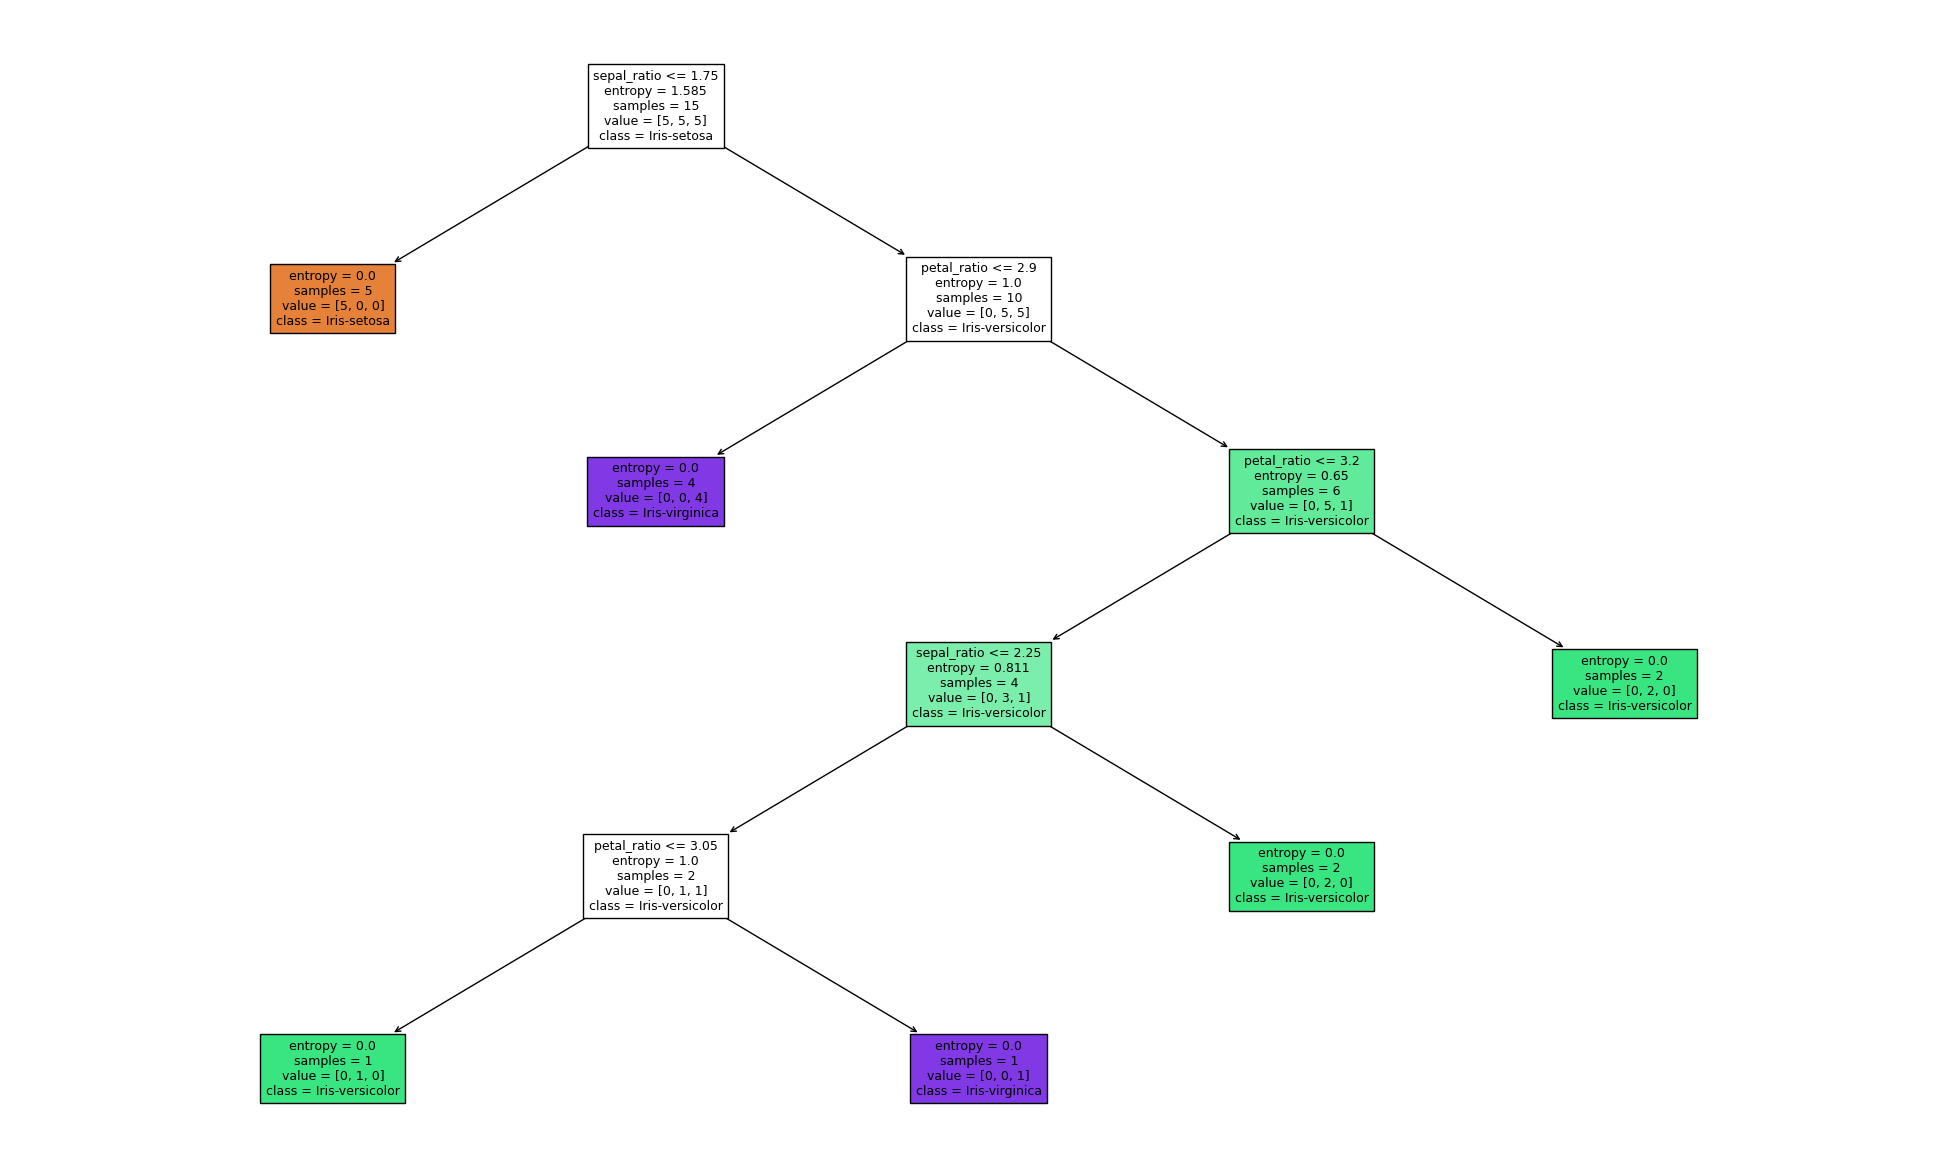

In [45]:
plt.figure(figsize=(25,15))
plot_tree(model,
          feature_names=['sepal_ratio', 'petal_ratio'],
          class_names=model.classes_,
          filled=True,
          fontsize=9)
plt.savefig("data/tugas7/assets/DCT_rule", dpi=300)
plt.show()

In [46]:
tree_rules = export_text(model, 
                         feature_names=['sepal_ratio', 'petal_ratio'],
                         decimals=1)
print("Decision Rules:\n")
print(tree_rules)

Decision Rules:

|--- sepal_ratio <= 1.8
|   |--- class: Iris-setosa
|--- sepal_ratio >  1.8
|   |--- petal_ratio <= 2.9
|   |   |--- class: Iris-virginica
|   |--- petal_ratio >  2.9
|   |   |--- petal_ratio <= 3.2
|   |   |   |--- sepal_ratio <= 2.2
|   |   |   |   |--- petal_ratio <= 3.0
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- petal_ratio >  3.0
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- sepal_ratio >  2.2
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- petal_ratio >  3.2
|   |   |   |--- class: Iris-versicolor



In [47]:
# Predict on training data
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Training Accuracy: {accuracy*100:.2f}%\n")

Training Accuracy: 100.00%



In [48]:
# Show classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [49]:
# Compare predictions with actual classes
comparison_df = pd.DataFrame({
    'Actual Class': y,
    'Predicted Class': y_pred,
    'Correct': y == y_pred
})
print("Prediction vs Actual Comparison:")
display(comparison_df)

Prediction vs Actual Comparison:


,Actual Class,Predicted Class,Correct
0,Iris-setosa,Iris-setosa,True
1,Iris-setosa,Iris-setosa,True
2,Iris-setosa,Iris-setosa,True
3,Iris-setosa,Iris-setosa,True
4,Iris-setosa,Iris-setosa,True
5,Iris-versicolor,Iris-versicolor,True
6,Iris-versicolor,Iris-versicolor,True
7,Iris-versicolor,Iris-versicolor,True
8,Iris-versicolor,Iris-versicolor,True
9,Iris-versicolor,Iris-versicolor,True


In [50]:
df_mysql = pd.read_csv("data/iris_mysql.csv")
df_postgre = pd.read_csv("data/iris-postgre.csv")
df_combined = pd.merge(df_postgre, df_mysql[['id', 'petal length', 'petal width']], on='id')
new_data_raw = df_combined[df_combined['id'].isin([6, 56])].copy()

new_data_raw.loc[:, 'sepal_ratio'] = (new_data_raw['sepal length'] / new_data_raw['sepal width']).round(1)
new_data_raw.loc[:, 'petal_ratio'] = (new_data_raw['petal length'] / new_data_raw['petal width']).round(1)

new_data = new_data_raw[['sepal_ratio', 'petal_ratio']]

print("Data Baru yang Akan Diprediksi:")
new_data_raw[['id', 'Class', 'sepal_ratio', 'petal_ratio']]

Data Baru yang Akan Diprediksi:


,id,Class,sepal_ratio,petal_ratio
5,6,Iris-setosa,1.4,4.2
55,56,Iris-versicolor,2.0,3.5


In [51]:
new_predictions = model.predict(new_data)
new_proba = model.predict_proba(new_data)

# Tampilkan hasil prediksi
print("Hasil Prediksi untuk Data Baru:")
for i in range(len(new_data)):
    print(f"Data ID {new_data_raw.iloc[i]['id']}:")
    print(f"  Fitur: sepal_ratio={new_data.iloc[i,0]}, petal_ratio={new_data.iloc[i,1]}")
    print(f"  Kelas Asli: {new_data_raw.iloc[i]['Class']}")
    print(f"  Prediksi Model: {new_predictions[i]}")
    print(f"  Probabilitas: {dict(zip(model.classes_, new_proba[i].round(3)))}\n")

Hasil Prediksi untuk Data Baru:
Data ID 6:
  Fitur: sepal_ratio=1.4, petal_ratio=4.2
  Kelas Asli: Iris-setosa
  Prediksi Model: Iris-setosa
  Probabilitas: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.0, 'Iris-virginica': 0.0}

Data ID 56:
  Fitur: sepal_ratio=2.0, petal_ratio=3.5
  Kelas Asli: Iris-versicolor
  Prediksi Model: Iris-versicolor
  Probabilitas: {'Iris-setosa': 0.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.0}



In [52]:
# Gabungkan data training dan data baru
all_data = pd.concat([
    final_data[['sepal_ratio', 'petal_ratio', 'Class']].assign(Source='Training'),
    new_data_raw[['sepal_ratio', 'petal_ratio', 'Class']].assign(Source='New')
], ignore_index=True)

# Prediksi untuk semua data
all_predictions = model.predict(all_data[['sepal_ratio', 'petal_ratio']])
all_proba = model.predict_proba(all_data[['sepal_ratio', 'petal_ratio']])

# Buat dataframe perbandingan lengkap
full_comparison = pd.DataFrame({
    'ID': [f"Train-{i}" for i in range(15)] + [f"New-{id}" for id in new_data_raw['id']],
    'Actual Class': all_data['Class'],
    'Predicted Class': all_predictions,
    'Correct': all_data['Class'] == all_predictions,
    'Source': all_data['Source']
})

# Tambahkan probabilitas
proba_df = pd.DataFrame(all_proba, columns=[f"Prob_{cls}" for cls in model.classes_])
full_comparison = pd.concat([full_comparison, proba_df], axis=1)

print("Full Prediction Comparison:")
full_comparison

Full Prediction Comparison:


,ID,Actual Class,Predicted Class,Correct,Source,Prob_Iris-setosa,Prob_Iris-versicolor,Prob_Iris-virginica
0,Train-0,Iris-setosa,Iris-setosa,True,Training,1.0,0.0,0.0
1,Train-1,Iris-setosa,Iris-setosa,True,Training,1.0,0.0,0.0
2,Train-2,Iris-setosa,Iris-setosa,True,Training,1.0,0.0,0.0
3,Train-3,Iris-setosa,Iris-setosa,True,Training,1.0,0.0,0.0
4,Train-4,Iris-setosa,Iris-setosa,True,Training,1.0,0.0,0.0
5,Train-5,Iris-versicolor,Iris-versicolor,True,Training,0.0,1.0,0.0
6,Train-6,Iris-versicolor,Iris-versicolor,True,Training,0.0,1.0,0.0
7,Train-7,Iris-versicolor,Iris-versicolor,True,Training,0.0,1.0,0.0
8,Train-8,Iris-versicolor,Iris-versicolor,True,Training,0.0,1.0,0.0
9,Train-9,Iris-versicolor,Iris-versicolor,True,Training,0.0,1.0,0.0
